In [1]:
#Import library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#load datashet
print("Load MNIST Database")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test= np.reshape(x_test,(10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)

Load MNIST Database
----------------------------------
(60000, 784)
(60000, 10)


In [3]:
#Define network parameter
learningRate = 0.5
Epoch = 10
NumTrainSamples = 1000
NumTestSamples = 10000

NumInputs = 784
NumHiddenUnits = 512
NumClasses = 10

In [4]:
#Define function
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

def fwp(x, W1, bh1, W2, bh2, Wo, bho):
    z1 = x@W1.T + bh1
    a1 = relu(z1)
    z2 = a1@W2.T + bh2
    a2 = sigmoid(z2)
    z3 = a2@Wo.T + bho
    o = softmax(z3)
    return o

def AccTest(label,prediction): # calculate the matching score
    OutMaxArg=np.argmax(prediction,axis=1)
    LabelMaxArg=np.argmax(label,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy
def relu_derivative(z):
    return 1.0 * (z > 0)


In [5]:
#Initial parameters
#Hidden layer
W1=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh1= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh1= np.zeros((NumHiddenUnits,NumInputs))
dbh1= np.zeros((1,NumHiddenUnits))
W2=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumHiddenUnits)))
bh2= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh2= np.zeros((NumHiddenUnits,NumHiddenUnits))
dbh2= np.zeros((1,NumHiddenUnits))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bho= np.random.uniform(0,0.5,(1,NumClasses))
dWo= np.zeros((NumClasses,NumHiddenUnits))
dbo= np.zeros((1,NumClasses))

In [6]:
o = fwp(x_test, W1, bh1, W2, bh2, Wo, bho)
accuracy = AccTest(o, y_test)
accuracy

0.0987

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

loss = []
Acc = [] 

for ep in range(Epoch): 
    # Forward propagation 
    x = x_train
    y = y_train
    zh1 = x @ W1.T + bh1
    a1 = relu(zh1)
    zh2 = a1 @ W2.T + bh2
    a2 = sigmoid(zh2)
    zh3 = a2 @ Wo.T + bho
    o = softmax(zh3) 
    
    # Calculate loss 
    loss.append(-np.sum(np.multiply(y, np.log(o))))
    
    # Calculate the error for the output layer 
    d = o - y 
    
    # Backpropagation of error 
    dh2 = d @ Wo 
    dh2s = np.multiply(np.multiply(dh2, a2), (1 - a2)) 
    dh1 = dh2s @ W2 
    dh1s = dh1 * relu_derivative(zh1).T

    dWo = np.matmul(np.transpose(d), a2)
    dbo = np.mean(d)
    dWh2 = np.matmul(np.transpose(dh2s), a1)
    dbh2 = np.mean(dh2s)
    dWh1 = np.matmul(np.transpose(dh1s), x)
    dbh1 = np.mean(dh1s)
    
    # Update weights and biases
    Wo = Wo - learningRate * dWo / NumTrainSamples
    bho = bho - learningRate * dbo
    W2 = W2 - learningRate * dWh2 / NumTrainSamples
    bh2 = bh2 - learningRate * dbh2
    W1 = W1 - learningRate * dWh1 / NumTrainSamples
    bh1 = bh1 - learningRate * dbh1
    
    # Test accuracy with random initial weights
    prediction = fwp(x_test, W1, bh1, W2, bh2, Wo, bho)
    Acc.append(AccTest(y_test, prediction))
    
    clear_output(wait=True)
    plt.plot([i for i, _ in enumerate(Acc)], Acc, 'o')
    plt.show()


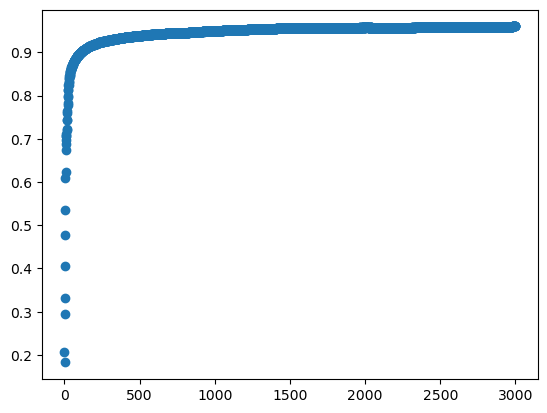

0.9598


In [3]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
#load datashet
print("Load MNIST Database")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test=np.reshape(x_test,(10000,784))/255.0
y_train=np.matrix(np.eye(10)[y_train])
y_test=np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)

#Define the function
def relu(x):
    return(np.maximum(0,x))

def sigmoid(x):
    return 1./(1.+np.exp(-x))

def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

def Forwardpass(X,Wh1,bh1,Wh2,bh2,Wo,bo):
    zh1=X@Wh1.T + bh1
    a1=relu(zh1)
    zh2=a1@Wh2.T + bh2
    a2=sigmoid(zh2)
    z=a2@Wo.T + bo
    o=softmax(z)
    return o
def AccTest(label,prediction):    # calculate the matching score
    OutMaxArg=np.argmax(prediction,axis=1)
    LabelMaxArg=np.argmax(label,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy

#Define network parameter
learningRate=0.2
Epoch=10
NumTrainSamples=60000
NumTestSamples=10000

NumInputs=784
NumHiddenUnits=512
NumClasses=10
#inital weights
#hidden layer 1
Wh1=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh1= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh1= np.zeros((NumHiddenUnits,NumInputs))
dbh1= np.zeros((1,NumHiddenUnits))
#hidden layer 2
Wh2=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumHiddenUnits)))
bh2= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh2= np.zeros((NumHiddenUnits,NumHiddenUnits))
dbh2= np.zeros((1,NumHiddenUnits))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo= np.random.uniform(0,0.5,(1,NumClasses))
dWo= np.zeros((NumClasses,NumHiddenUnits))
dbo= np.zeros((1,NumClasses))

#Training
from IPython.display import clear_output
loss=[]
Acc=[]
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
    np.random.shuffle(Stochastic_samples)
    for ite in range (0,NumTrainSamples,Batch_size):
        #feed fordware propagation
        Batch_samples = Stochastic_samples[ite:ite+Batch_size]
        x = x_train[Batch_samples,:]
        y=y_train[Batch_samples,:]
        x=x_train
        y=y_train
        # hidden layer 1 computation
        zh1=x@Wh1.T + bh1
        a1=relu(zh1)
        # hidden layer 2 computation
        zh2=a1@Wh2.T + bh2
        a2=sigmoid(zh2)
        # output layer computation
        z=a2@Wo.T + bo
        o=softmax(z)
        #calculate loss
        loss.append(-np.sum(np.multiply(y,np.log10(o))))
        #calculate the error for the ouput layer
        d=o-y
        #Back propagate error
        dh2=d@Wo
        dhs2=np.multiply(dh2,np.multiply(a2,(1-a2)))
        dh1=dhs2@Wh2
        dhs1=np.multiply(dh1,a1)
        #update weight
        dWo=np.matmul(np.transpose(d),a2)
        dbo=np.mean(d)    # consider a is 1 for bias
        dWh2=np.matmul(np.transpose(dhs2),a1)
        dbh2=np.mean(dhs2)  # consider a is 1 for bias
        dWh1=np.matmul(np.transpose(dhs1),x)
        dbh=np.mean(dhs1)  # consider a is 1 for bias
        Wo=Wo-learningRate*dWo/Batch_size
        bo=bo-learningRate*dbo
        Wh2=Wh2-learningRate*dWh2/Batch_size
        bh2=bh2-learningRate*dbh2
        Wh1=Wh1-learningRate*dWh1/Batch_size
        bh1=bh1-learningRate*dbh1
        #Test accuracy with random innitial weights
        prediction= Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
        Acc.append(AccTest(y_test,prediction))
        clear_output(wait=True)
        plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
        plt.show()
#Print the accuracy
prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
Rate = AccTest(y_test,prediction)
print(Rate)


In [34]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
#load datashet
print("Load MNIST Database")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test=np.reshape(x_test,(10000,784))/255.0
y_train=np.matrix(np.eye(10)[y_train])
y_test=np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)

#Define the function

def sigmoid(x):
    return 1./(1.+np.exp(-x))

def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

def Forwardpass(X,Wh1,bh1,Wh2,bh2,Wo,bo):
    zh1=X@Wh1.T + bh1
    a1=sigmoid(zh1)
    zh2=a1@Wh2.T + bh2
    a2=sigmoid(zh2)
    z=a2@Wo.T + bo
    o=softmax(z)
    return o
def AccTest(label,prediction):    # calculate the matching score
    OutMaxArg=np.argmax(prediction,axis=1)
    LabelMaxArg=np.argmax(label,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy

#Define network parameter
learningRate=0.2
Epoch=10
NumTrainSamples=60000
NumTestSamples=10000

NumInputs=784
NumHiddenUnits=512
NumClasses=10
#inital weights
#hidden layer 1
Wh1=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh1= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh1= np.zeros((NumHiddenUnits,NumInputs))
dbh1= np.zeros((1,NumHiddenUnits))
#hidden layer 2
Wh2=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumHiddenUnits)))
bh2= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh2= np.zeros((NumHiddenUnits,NumHiddenUnits))
dbh2= np.zeros((1,NumHiddenUnits))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo= np.random.uniform(0,0.5,(1,NumClasses))
dWo= np.zeros((NumClasses,NumHiddenUnits))
dbo= np.zeros((1,NumClasses))

#Training with momentum optimization
from IPython.display import clear_output
loss=[]
Acc=[]
v_dWo = np.zeros((NumClasses,NumHiddenUnits))
v_dbo = np.zeros((1,NumClasses))
v_dWh2 = np.zeros((NumHiddenUnits,NumHiddenUnits))
v_dbh2 = np.zeros((1,NumHiddenUnits))
v_dWh1 = np.zeros((NumHiddenUnits,NumInputs))
v_dbh1 = np.zeros((1,NumHiddenUnits))
beta = 0.9
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
    np.random.shuffle(Stochastic_samples)
    for ite in range (0,NumTrainSamples,Batch_size): 
        #feed fordware propagation
        Batch_samples = Stochastic_samples[ite:ite+Batch_size]
        x = x_train[Batch_samples,:]
        y=y_train[Batch_samples,:]
        x=x_train
        y=y_train
        # hidden layer 1 computation
        zh1=x@Wh1.T + bh1
        a1=sigmoid(zh1)
        # hidden layer 2 computation
        zh2=a1@Wh2.T + bh2
        a2=sigmoid(zh2)
        # output layer computation
        z=a2@Wo.T + bo
        o=softmax(z)
        #calculate loss
        loss.append(-np.sum(np.multiply(y,np.log10(o))))
        #calculate the error for the ouput layer
        d=o-y
        #Back propagate error
        dh2=d@Wo
        dhs2=np.multiply(dh2,np.multiply(a2,(1-a2)))
        dh1=dhs2@Wh2
        dhs1=np.multiply(dh1,np.multiply(a1,(1-a1)))

        dWo=np.matmul(np.transpose(d),a2)
        dbo=np.mean(d)    # consider a is 1 for bias
        dWh2=np.matmul(np.transpose(dhs2),a1)
        dbh2=np.mean(dhs2)  # consider a is 1 for bias
        dWh1=np.matmul(np.transpose(dhs1),x)
        dbh=np.mean(dhs1)  # consider a is 1 for bias
        #update weight with momentum optimization

        Wo = Wo - (learningRate*dWo/NumTrainSamples + beta*v_dWo)
        bo = bo - (learningRate*dbo + beta*v_dbo)
        Wh2 = Wh2 - (learningRate*dWh2/NumTrainSamples + beta*v_dWh2)
        bh2 = bh2 - (learningRate*dbh2 +  beta*v_dbh2)
        Wh1 = Wh1 - (learningRate*dWh1/NumTrainSamples + beta*v_dWh1)
        bh1 = bh1 - (learningRate*dbh1 + beta*v_dbh1)

        v_dWo = (learningRate*v_dWo/NumTrainSamples + beta*v_dWo)
        v_dbo = (learningRate*v_dbo + beta*v_dbo)
        v_dWh2 = (learningRate*v_dWh2/NumTrainSamples + beta*v_dWh2)
        v_dbh2 = (learningRate*v_dbh2 +  beta*v_dbh2)
        v_dWh1 = (learningRate*v_dWh1/NumTrainSamples + beta*v_dWh1)
        v_dbh1 = (learningRate*v_dbh1 + beta*v_dbh1)
    #Test accuracy with random innitial weights
    prediction= Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
    Acc.append(AccTest(y_test,prediction))
    clear_output(wait=True)
    plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
    plt.show()

#Print the accuracy
prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
Rate = AccTest(y_test,prediction)
print(Rate)


Load MNIST Database
----------------------------------
(60000, 784)
(60000, 10)


KeyboardInterrupt: 

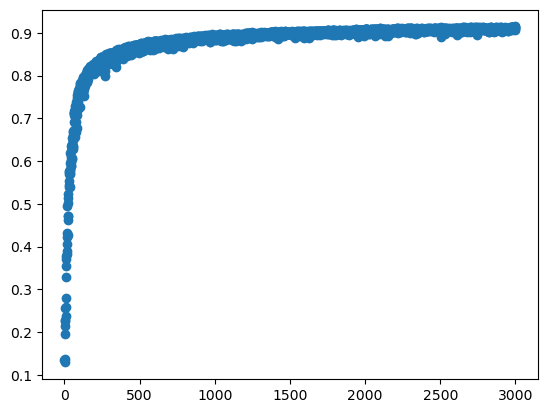

0.908


In [26]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
#load datashet
print("Load MNIST Database")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test=np.reshape(x_test,(10000,784))/255.0
y_train=np.matrix(np.eye(10)[y_train])
y_test=np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)

#Define the function
def relu(x):
    return(np.maximum(0,x))

def sigmoid(x):
    return 1./(1.+np.exp(-x))

def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

def Forwardpass(X,Wh1,bh1,Wh2,bh2,Wo,bo):
    zh1=X@Wh1.T + bh1
    a1=relu(zh1)
    zh2=a1@Wh2.T + bh2
    a2=sigmoid(zh2)
    z=a2@Wo.T + bo
    o=softmax(z)
    return o

def derivatives_relu(x):
    temp = x
    temp[temp>=0]=1
    temp[temp<0]=0
    return temp

def AccTest(label,prediction):    # calculate the matching score
    OutMaxArg=np.argmax(prediction,axis=1)
    LabelMaxArg=np.argmax(label,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy

#Define network parameter
learningRate=0.2
Epoch=10
NumTrainSamples=60000
NumTestSamples=10000

NumInputs=784
NumHiddenUnits=512
NumClasses=10
#inital weights
#hidden layer 1
Wh1=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh1= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh1= np.zeros((NumHiddenUnits,NumInputs))
dbh1= np.zeros((1,NumHiddenUnits))
#hidden layer 2
Wh2=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumHiddenUnits)))
bh2= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh2= np.zeros((NumHiddenUnits,NumHiddenUnits))
dbh2= np.zeros((1,NumHiddenUnits))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo= np.random.uniform(0,0.5,(1,NumClasses))
dWo= np.zeros((NumClasses,NumHiddenUnits))
dbo= np.zeros((1,NumClasses))

#Training
from IPython.display import clear_output
loss = []
Acc = []
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
    np.random.shuffle(Stochastic_samples)
    for ite in range (0,NumTrainSamples,Batch_size): 
        #feed fordware propagation
        Batch_samples = Stochastic_samples[ite:ite+Batch_size]
        x = x_train[Batch_samples,:]
        y=y_train[Batch_samples,:]

        zh1 = x@Wh1.T + bh1
        a = relu(zh1)

        zh2 = a@Wh2.T + bh2
        b = sigmoid(zh2)

        z = b@Wo.T + bo
        o = softmax(z)

        #calculate loss
        loss.append(-np.sum(np.multiply(y,np.log10(o))))
        #calculate the error for the ouput layer
        d = o-y

        #Back propagate error
        dh2 = d@Wo
        dhs2 = np.multiply(np.multiply(dh2,b),(1-b))

        dh1 = dh2@Wh2
        dhs1 = np.multiply(dh1, derivatives_relu(a))

        dWo = np.matmul(np.transpose(d),b)
        dbo = np.mean(d) 

        dWh2 = np.matmul(np.transpose(dhs2),a)
        dbh2 = np.mean(dhs2)


        # Update weight 
        Wo = Wo - learningRate * dWo / Batch_size
        bo = bo - learningRate * dbo

        Wh2 = Wh2 - learningRate * dWh2 / Batch_size
        bh2 = bh2 - learningRate * dbh2

        Wh1 = Wh1 - learningRate * dWh1 / Batch_size
        bh1 = bh1 - learningRate * dbh1
        #Test accuracy with random innitial weights
        prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
        Acc.append(AccTest(y_test,prediction))
        clear_output(wait=True)
        plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
        plt.show()
prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
Rate = AccTest(y_test,prediction)
print(Rate)

Load MNIST Dataset
----------------------------------
(60000, 784)
(60000, 10)
0:00:14.261848
Training epoch 0
Cross-Entropy 22.544366
Accuracy: 0.937800
0:00:13.470761
Training epoch 1
Cross-Entropy 10.458571
Accuracy: 0.950800
0:00:13.383270
Training epoch 2
Cross-Entropy 8.020246
Accuracy: 0.958500
0:00:13.432277
Training epoch 3
Cross-Entropy 6.705115
Accuracy: 0.962500
0:00:13.453174
Training epoch 4
Cross-Entropy 5.823990
Accuracy: 0.966500
0:00:13.364128
Training epoch 5
Cross-Entropy 5.121545
Accuracy: 0.965000
0:00:13.393517
Training epoch 6
Cross-Entropy 4.630518
Accuracy: 0.966500
0:00:13.387784
Training epoch 7
Cross-Entropy 4.104925
Accuracy: 0.969500
0:00:13.513590
Training epoch 8
Cross-Entropy 3.850510
Accuracy: 0.972200
0:00:13.548801
Training epoch 9
Cross-Entropy 3.581800
Accuracy: 0.972200
Total time :  0:02:18.418007


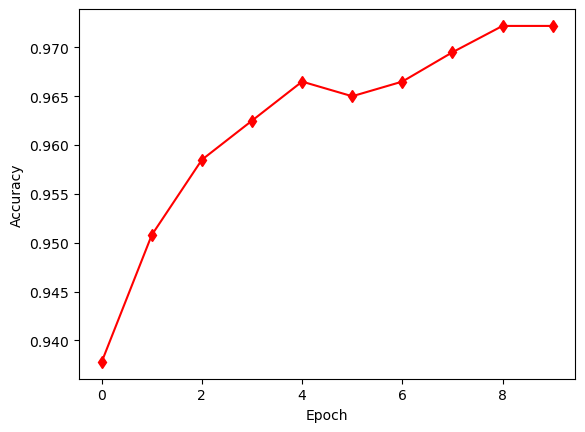

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#load dataset
print("Load MNIST Dataset")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test= np.reshape(x_test,(10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)
import datetime as dt

def sigmoid(x):
    return 1./(1.+np.exp(-x))
def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

def AccTest(outN,labels): # calculate the matching score
    OutMaxArg=np.argmax(outN,axis=1)
    LabelMaxArg=np.argmax(labels,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy
def feedforward(samples,Wh1,bh1,Wh2,bh2,Wo,bo,Dropout):
    z1 = samples@Wh1.T+bh1
    OutH1=sigmoid(z1)
    z2= OutH1@Wh2.T+bh2
    OutH2=sigmoid(z2)
    OutN=softmax(OutH2@Wo.T+bo)
    return OutN

learningRate = 0.2
BatchSize= 100
Epoch=10
Momentum=0.9
p = 0.5 # dropout probability for hidden layer
NumOfTrainSample=60000
NumOfTestSample=10000
NumInput=784
NumHidden=512
NumOutput=10; # number of classes
#Hidden layer 1
Wh1=np.matrix(np.random.uniform(-0.5,0.5,(NumHidden,NumInput)))
bh1= np.random.uniform(0,0.5,(1,NumHidden))
del_Wh1= np.zeros((NumHidden,NumInput))
del_bh1= np.zeros((1,NumHidden))
#Hidden layer 2
Wh2=np.matrix(np.random.uniform(-0.5,0.5,(NumHidden,NumHidden)))
bh2= np.random.uniform(0,0.5,(1,NumHidden))
del_Wh2= np.zeros((NumHidden,NumHidden))
del_bh2= np.zeros((1,NumHidden))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumOutput,NumHidden))
bo= np.random.uniform(0,0.5,(1,NumOutput))
del_Wo= np.zeros((NumOutput,NumHidden))
del_bo= np.zeros((1,NumOutput))
SampleIdx=np.arange(NumOfTrainSample)
t_start=t1=dt.datetime.now()

Acc=np.zeros(Epoch)
Cost_Entropy=np.zeros(Epoch)
IdxCost=0;
Cost=np.zeros(np.int64(np.ceil(NumOfTrainSample/BatchSize)))
for ep in range(Epoch):
    t1=dt.datetime.now()
    # Shuffle the trainning samples
    np.random.shuffle(SampleIdx)
    for i in range(0,NumOfTrainSample-BatchSize,BatchSize):
        # Dropout
        # visible a number neurons in hidden layer
        Dropout=np.random.binomial(size=(BatchSize,NumHidden), n=1, p= p)
        # Mini-batch Gradient descent algorithm
        Batch_sample=SampleIdx[i:i+BatchSize]
        #print(Batch_sample)
        x=np.matrix(x_train[Batch_sample,:])
        y=np.matrix(y_train [Batch_sample,:])
        # Feedforward propagation
        z1=np.matmul(x,Wh1.T)+bh1
        a=sigmoid(z1) # ngõ ra lớp ẩn thứ nhất
        z2=np.matmul(a,Wh2.T)+bh2
        b=sigmoid(z2) # ngõ ra lớp ẩn thứ 2 
        #apply dropout to feed-forward propagation
        a=np.multiply(a,Dropout)
        b=np.multiply(b,Dropout)
        o =softmax(np.dot(b,Wo.T)+bo)
        #calculate cross-entropy
        Cost[IdxCost]=-np.sum(np.multiply(y,np.log10(o)))
        IdxCost+=1;
        #calculate loss function
        do=(y-o)
        dWo=np.matrix(np.dot(do.T,b)/BatchSize)
        dbo=np.mean(do,0)
        WoUpdate=learningRate*dWo + Momentum*del_Wo
        boUpdate= learningRate*dbo + Momentum*del_bo
        del_Wo=WoUpdate
        del_bo=boUpdate
        Wo=Wo + WoUpdate
        bo=bo + boUpdate
        #back propagate error
        dh2=np.multiply(np.dot(do,Wo),np.multiply(b,(1-b)))
        dh1=np.multiply(dh2@Wh2,np.multiply(a,(1-a)))
        #apply dropout to backpropagation
        dh1=np.multiply(dh1,Dropout)
        dWh1=np.dot(dh1.T,x)/BatchSize
        dbh1=np.mean(dh1,0)

        dh2=np.multiply(dh2,Dropout)
        dWh2=np.dot(dh2.T,a)/BatchSize
        dbh2=np.mean(dh2,0)
        # Update weight
        Wh1Update=learningRate*dWh1 + Momentum*del_Wh1
        bh1Update=learningRate*dbh1 + Momentum*del_bh1
        del_Wh1=Wh1Update;
        del_bh1=bh1Update;
        Wh1=Wh1+ Wh1Update
        bh1=bh1+bh1Update

        Wh2Update=learningRate*dWh2 + Momentum*del_Wh2
        bh2Update=learningRate*dbh2 + Momentum*del_bh2
        del_Wh2=Wh2Update;
        del_bh2=bh2Update;
        Wh2=Wh2+ Wh2Update
        bh2=bh2+bh2Update
    Cost_Entropy[ep]=np.mean(Cost)
    IdxCost=0
    t2=dt.datetime.now()
    print(t2-t1)
    print("Training epoch %i" % ep)
    print("Cross-Entropy %f" % Cost_Entropy[ep])
    #test the model
    RealOutN=feedforward(x_test,Wh1,bh1,Wh2,bh2,Wo,bo,p)
    Accuracy=AccTest(RealOutN,y_test)
    Acc[ep]=Accuracy
    print("Accuracy: %f" % Accuracy)
t_end=dt.datetime.now() - t_start
print("Total time : ", t_end)
plt.plot(Acc,"dr-")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Load MNIST Dataset
----------------------------------
(60000, 784)
(60000, 10)
0:00:08.672852
Training epoch 0
Cross-Entropy 204.011396
Accuracy: 0.940100
0:00:08.950061
Training epoch 1
Cross-Entropy 7.480805
Accuracy: 0.961700
0:00:08.687909
Training epoch 2
Cross-Entropy 4.989503
Accuracy: 0.962500
0:00:08.295386
Training epoch 3
Cross-Entropy 3.801911
Accuracy: 0.968400
0:00:08.817445
Training epoch 4
Cross-Entropy 2.949247
Accuracy: 0.973700
0:00:08.467927
Training epoch 5
Cross-Entropy 2.356809
Accuracy: 0.973000
0:00:08.495905
Training epoch 6
Cross-Entropy 1.916997
Accuracy: 0.975800
0:00:08.336871
Training epoch 7
Cross-Entropy 1.543349
Accuracy: 0.976000
0:00:08.411854
Training epoch 8
Cross-Entropy 1.264896
Accuracy: 0.977800
0:00:08.590289
Training epoch 9
Cross-Entropy 1.034842
Accuracy: 0.978400
Total time :  0:01:29.138863


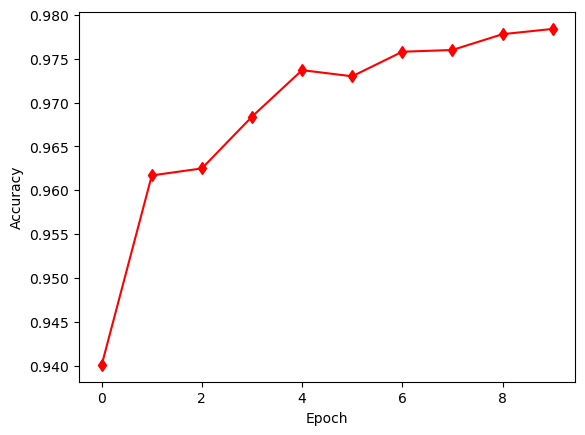

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime as dt
#load dataset
print("Load MNIST Dataset")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test= np.reshape(x_test,(10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)

def sigmoid(x):
    return 1./(1.+np.exp(-x))

def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

def AccTest(outN,labels): # calculate the matching score
    OutMaxArg=np.argmax(outN,axis=1)
    LabelMaxArg=np.argmax(labels,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy

def feedforward(samples,Wh1,bh1,Wh2,bh2,Wo,bo):
    OutH1=sigmoid(samples@Wh1.T+bh1)
    OutH2=sigmoid(OutH1@Wh2.T+bh2)
    OutN=softmax(OutH2@Wo.T+bo)
    return OutN

# define network parameters
learningRate = 0.2
e = 0.01
BatchSize= 100
Epoch=10
NumOfTrainSample=60000
NumOfTestSample=10000
NumInput=784
NumHidden=512
NumOutput=10; # number of classes
#Hidden layer 1
Wh1=np.matrix(np.random.uniform(-0.5,0.5,(NumHidden,NumInput)))
bh1= np.random.uniform(0,0.5,(1,NumHidden))
dWh1= np.zeros((NumHidden,NumInput))
dWh1_adagrad= np.zeros((NumHidden,NumInput))
dbh1_adagrad= np.zeros((1,NumHidden))
#Hidden layer 2
Wh2=np.matrix(np.random.uniform(-0.5,0.5,(NumHidden,NumHidden)))
bh2= np.random.uniform(0,0.5,(1,NumHidden))
dWh2= np.zeros((NumHidden,NumHidden))
dWh2_adagrad= np.zeros((NumHidden,NumHidden))
dbh2_adagrad= np.zeros((1,NumHidden))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumOutput,NumHidden))
bo= np.random.uniform(0,0.5,(1,NumOutput))
dWo_adagrad= np.zeros((NumOutput,NumHidden))
dbo_adagrad= np.zeros((1,NumOutput))

# Train the network with back propagation, stochastic Gradient descent
SampleIdx=np.arange(NumOfTrainSample)
t_start=t1=dt.datetime.now()
Acc=np.zeros(Epoch)
Cost_Entropy=np.zeros(Epoch)
IdxCost=0;
Cost=np.zeros(np.int64(np.ceil(NumOfTrainSample/BatchSize)))
for ep in range(Epoch):
    t1=dt.datetime.now()
  # Shuffle the trainning samples
    np.random.shuffle(SampleIdx)
    for i in range(0,NumOfTrainSample-BatchSize,BatchSize):
        # Mini-batch Gradient descent algorithm
        Batch_sample=SampleIdx[i:i+BatchSize]
        #print(Batch_sample)
        x=x_train[Batch_sample,:]
        y=y_train [Batch_sample,:]
        # Feedforward propagation
        a1=sigmoid(np.dot(x,Wh1.T)+bh1)
        a2=sigmoid(np.dot(a1,Wh2.T)+bh2)
        o =softmax(np.dot(a2,Wo.T)+bo)
        #calculate cross-entropy
        Cost[IdxCost]=-np.sum(np.multiply(y,np.log10(o)))
        IdxCost+=1;
        #calculate loss function
        do=(y-o)
        dWo=np.matrix(np.dot(do.T,a2)/BatchSize)
        dbo=np.mean(do,0)
        dWo_adagrad+=np.multiply(dWo,dWo)
        dbo_adagrad+=np.multiply(dbo,dbo)
        #adaptive learning rate
        Wo=Wo + np.multiply((learningRate/np.sqrt(dWo_adagrad+e)),dWo)
        bo=bo + np.multiply((learningRate/np.sqrt(dbo_adagrad+e)),dbo)
        #back propagate error
        dh2=np.multiply(np.dot(do,Wo),np.multiply(a2,(1-a2)))
        dWh2=np.dot(dh2.T,a1)/BatchSize
        dbh2=np.mean(dh2,0)

        dh1=np.multiply(dh2@Wh2,np.multiply(a1,(1-a1)))
        dWh1=np.dot(dh1.T,x)/BatchSize
        dbh1=np.mean(dh1,0)
        # Update weight
        dWh2_adagrad+=np.multiply(dWh2,dWh2)
        dbh2_adagrad+=np.multiply(dbh2,dbh2)
        Wh2=Wh2 + np.multiply((learningRate/np.sqrt(dWh2_adagrad+e)),dWh2)
        bh2=bh2 + np.multiply((learningRate/np.sqrt(dbh2_adagrad+e)),dbh2)

        dWh1_adagrad+=np.multiply(dWh1,dWh1)
        dbh1_adagrad+=np.multiply(dbh1,dbh1)
        Wh1=Wh1 + np.multiply((learningRate/np.sqrt(dWh1_adagrad+e)),dWh1)
        bh1=bh1 + np.multiply((learningRate/np.sqrt(dbh1_adagrad+e)),dbh1)
    Cost_Entropy[ep]=np.mean(Cost)
    IdxCost=0
    t2=dt.datetime.now()
    print(t2-t1)
    print("Training epoch %i" % ep)
    print("Cross-Entropy %f" % Cost_Entropy[ep])
    #test the model
    RealOutN=feedforward(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
    Accuracy=AccTest(RealOutN,y_test)
    Acc[ep]=Accuracy
    print("Accuracy: %f" % Accuracy)
t_end=dt.datetime.now() - t_start
print("Total time : ", t_end)
plt.plot(Acc,"dr-")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Load MNIST Dataset
----------------------------------
(60000, 784)
(60000, 10)
0:00:13.323821
Training epoch 0
Cross-Entropy 67.314554
Accuracy: 0.936700
0:00:13.718958
Training epoch 1
Cross-Entropy 8.102096
Accuracy: 0.948100
0:00:13.413805
Training epoch 2
Cross-Entropy 5.657545
Accuracy: 0.958900
0:00:13.212070
Training epoch 3
Cross-Entropy 4.446308
Accuracy: 0.960400
0:00:12.887165
Training epoch 4
Cross-Entropy 3.453543
Accuracy: 0.969400
0:00:13.016616
Training epoch 5
Cross-Entropy 2.806996
Accuracy: 0.964800
0:00:13.147762
Training epoch 6
Cross-Entropy 2.259891
Accuracy: 0.972600
0:00:13.516454
Training epoch 7
Cross-Entropy 1.919210
Accuracy: 0.974300
0:00:12.772304
Training epoch 8
Cross-Entropy 1.558257
Accuracy: 0.974900
0:00:12.755849
Training epoch 9
Cross-Entropy 1.321953
Accuracy: 0.974900
Total time :  0:02:14.964180


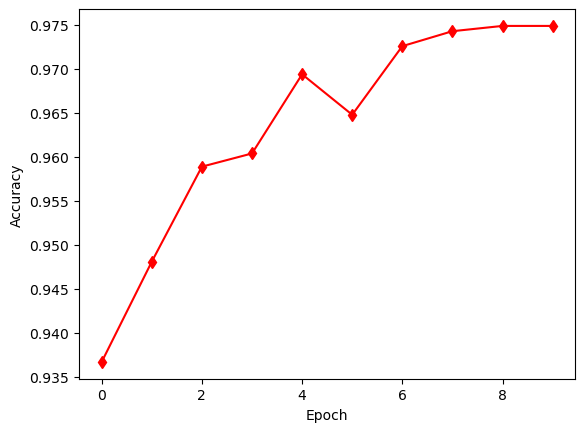

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#load dataset
print("Load MNIST Dataset")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test= np.reshape(x_test,(10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)
import datetime as dt

def sigmoid(x):
    return 1./(1.+np.exp(-x))
def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

def AccTest(outN,labels): # calculate the matching score
    OutMaxArg=np.argmax(outN,axis=1)
    LabelMaxArg=np.argmax(labels,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy
def feedforward(samples,Wh1,bh1,Wh2,bh2,Wo,bo,Dropout):
    z1 = samples@Wh1.T+bh1
    OutH1=sigmoid(z1)
    z2= OutH1@Wh2.T+bh2
    OutH2=sigmoid(z2)
    OutN=softmax(OutH2@Wo.T+bo)
    return OutN

learningRate = 0.2
BatchSize= 100
Epoch=10
Momentum=0.9
NumOfTrainSample=60000
NumOfTestSample=10000
NumInput=784
NumHidden=512
NumOutput=10; # number of classes
#Hidden layer 1
Wh1=np.matrix(np.random.uniform(-0.5,0.5,(NumHidden,NumInput)))
bh1= np.random.uniform(0,0.5,(1,NumHidden))
del_Wh1= np.zeros((NumHidden,NumInput))
del_bh1= np.zeros((1,NumHidden))
#Hidden layer 2
Wh2=np.matrix(np.random.uniform(-0.5,0.5,(NumHidden,NumHidden)))
bh2= np.random.uniform(0,0.5,(1,NumHidden))
del_Wh2= np.zeros((NumHidden,NumHidden))
del_bh2= np.zeros((1,NumHidden))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumOutput,NumHidden))
bo= np.random.uniform(0,0.5,(1,NumOutput))
del_Wo= np.zeros((NumOutput,NumHidden))
del_bo= np.zeros((1,NumOutput))
SampleIdx=np.arange(NumOfTrainSample)
t_start=t1=dt.datetime.now()

Acc=np.zeros(Epoch)
Cost_Entropy=np.zeros(Epoch)
IdxCost=0;
Cost=np.zeros(np.int64(np.ceil(NumOfTrainSample/BatchSize)))
for ep in range(Epoch):
    t1=dt.datetime.now()
    # Shuffle the trainning samples
    np.random.shuffle(SampleIdx)
    for i in range(0,NumOfTrainSample-BatchSize,BatchSize):
        # Mini-batch Gradient descent algorithm
        Batch_sample=SampleIdx[i:i+BatchSize]
        #print(Batch_sample)
        x=np.matrix(x_train[Batch_sample,:])
        y=np.matrix(y_train [Batch_sample,:])
        # Feedforward propagation
        z1=np.matmul(x,Wh1.T)+bh1
        a=sigmoid(z1) # ngõ ra lớp ẩn thứ nhất
        z2=np.matmul(a,Wh2.T)+bh2
        b=sigmoid(z2) # ngõ ra lớp ẩn thứ 2 
        #apply dropout to feed-forward propagation
        o =softmax(np.dot(b,Wo.T)+bo)
        #calculate cross-entropy
        Cost[IdxCost]=-np.sum(np.multiply(y,np.log10(o)))
        IdxCost+=1;
        #calculate loss function
        do=(y-o)
        dWo=np.matrix(np.dot(do.T,b)/BatchSize)
        dbo=np.mean(do,0)
        WoUpdate=learningRate*dWo + Momentum*del_Wo
        boUpdate= learningRate*dbo + Momentum*del_bo
        del_Wo=WoUpdate
        del_bo=boUpdate
        Wo=Wo + WoUpdate
        bo=bo + boUpdate
        #back propagate error
        dh2=np.multiply(np.dot(do,Wo),np.multiply(b,(1-b)))
        dh1=np.multiply(dh2@Wh2,np.multiply(a,(1-a)))
        #apply dropout to backpropagation
        dh1=np.multiply(dh1,Dropout)
        dWh1=np.dot(dh1.T,x)/BatchSize
        dbh1=np.mean(dh1,0)

        dh2=np.multiply(dh2,Dropout)
        dWh2=np.dot(dh2.T,a)/BatchSize
        dbh2=np.mean(dh2,0)
        # Update weight
        Wh1Update=learningRate*dWh1 + Momentum*del_Wh1
        bh1Update=learningRate*dbh1 + Momentum*del_bh1
        del_Wh1=Wh1Update;
        del_bh1=bh1Update;
        Wh1=Wh1+ Wh1Update
        bh1=bh1+bh1Update

        Wh2Update=learningRate*dWh2 + Momentum*del_Wh2
        bh2Update=learningRate*dbh2 + Momentum*del_bh2
        del_Wh2=Wh2Update;
        del_bh2=bh2Update;
        Wh2=Wh2+ Wh2Update
        bh2=bh2+bh2Update
    Cost_Entropy[ep]=np.mean(Cost)
    IdxCost=0
    t2=dt.datetime.now()
    print(t2-t1)
    print("Training epoch %i" % ep)
    print("Cross-Entropy %f" % Cost_Entropy[ep])
    #test the model
    RealOutN=feedforward(x_test,Wh1,bh1,Wh2,bh2,Wo,bo,p)
    Accuracy=AccTest(RealOutN,y_test)
    Acc[ep]=Accuracy
    print("Accuracy: %f" % Accuracy)
t_end=dt.datetime.now() - t_start
print("Total time : ", t_end)
plt.plot(Acc,"dr-")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()